<a href="https://colab.research.google.com/github/KavyaGandu/Data-mining/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN COMPLAB   

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("ggplot2")

Load and visualize the data

In [ ]:
data <- read.delim("/clipped_data.txt",sep = "\t",header = FALSE) #special case to read.dot table- larger data

In [ ]:
train <- data.frame(X1=data[,1],X2 = data[,2],Y = data[,3])

data.frame is a fun in R used to create a data frame.It specifies columns of the dataframe and their values. X1<- extracts the first column of the data and others from their respective columns

In [ ]:
dim(train)  #dimensions here 200 rows and 3 columns

[1] 200   3

In [ ]:
head(train) #first 5 observations

,X1,X2,Y
,<dbl>,<dbl>,<int>
1,2.52609297,0.3210504,0
2,0.36695447,0.0314621,0
3,0.76821908,0.7174862,0
4,0.69343568,0.7771940,0
5,-0.01983662,0.8672537,0
6,2.19654493,-1.0230141,0


In [ ]:
g <- ggplot(train, aes(X1,X2)) + geom_point(aes(colour = as.factor(Y))) + theme(legend.position = "none")

- ggplot obj namesd as g -> build the plot. mapping using aes()
-geom_oint() -> points in the plot should be colored by the factor var "Y"
+ theme(legend.position = "none"): This line sets the theme of the plot, specifically adjusting the position of the legend. Setting legend.position = "none" means that the legend, which would normally show the colors used for the different categories of Y, will not be displayed in the plot. This can be useful when you don't want to show the legend for categorical variables.


Warning message in quartz():
“Quartz device is not available on this platform”


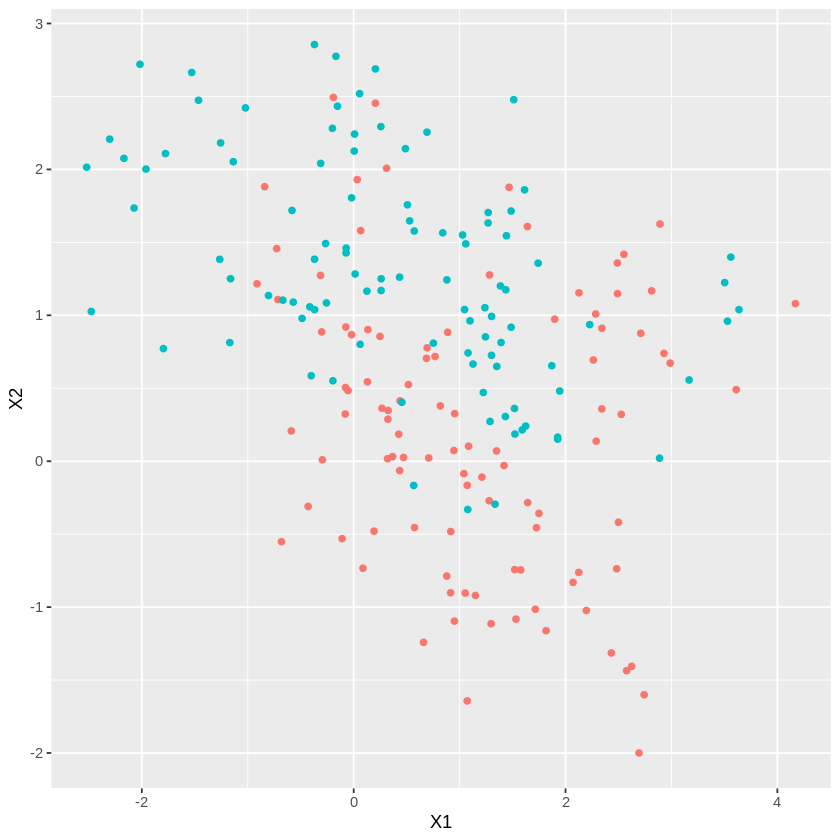

In [ ]:
quartz() #calls up a window
plot(g)

In [ ]:
ggsave(filename = "orig.png",plot = g,height =5,width =5)

Create a test data set- a grid of values spanning the ranges of X1 and X2
(long term goal for visulalization)

In [ ]:
minX1 <- min(train$X1 )
minX2 <- min(train$X2)
maxX1 <- max(train$X1)
maxX2 <- max(train$X2)

In [ ]:
minX1
minX2
maxX1
maxX2

[1] -2.52082

[1] -1.999853

[1] 4.170746

[1] 2.855805

Ranges  

In [ ]:
X1.range <- seq(from = minX1, to = maxX1,length.out = 100 ) #range of 100 values fri=om min X1 to max X1

In [ ]:
X1.range

[1] -2.52081968 -2.45322810 -2.38563653 -2.31804495 -2.25045338 -2.18286180
  [7] -2.11527023 -2.04767865 -1.98008708 -1.91249551 -1.84490393 -1.77731236
 [13] -1.70972078 -1.64212921 -1.57453763 -1.50694606 -1.43935448 -1.37176291
 [19] -1.30417133 -1.23657976 -1.16898819 -1.10139661 -1.03380504 -0.96621346
 [25] -0.89862189 -0.83103031 -0.76343874 -0.69584716 -0.62825559 -0.56066401
 [31] -0.49307244 -0.42548086 -0.35788929 -0.29029772 -0.22270614 -0.15511457
 [37] -0.08752299 -0.01993142  0.04766016  0.11525173  0.18284331  0.25043488
 [43]  0.31802646  0.38561803  0.45320961  0.52080118  0.58839275  0.65598433
 [49]  0.72357590  0.79116748  0.85875905  0.92635063  0.99394220  1.06153378
 [55]  1.12912535  1.19671693  1.26430850  1.33190007  1.39949165  1.46708322
 [61]  1.53467480  1.60226637  1.66985795  1.73744952  1.80504110  1.87263267
 [67]  1.94022425  2.00781582  2.07540740  2.14299897  2.21059054  2.27818212
 [73]  2.34577369  2.41336527  2.48095684  2.54854842  2.61613999  2.68373157
 [79]  2.75132314  2.81891472  2.88650629  2.95409787  3.02168944  3.08928101
 [85]  3.15687259  3.22446416  3.29205574  3.35964731  3.42723889  3.49483046
 [91]  3.56242204  3.63001361  3.69760519  3.76519676  3.83278834  3.90037991
 [97]  3.96797148  4.03556306  4.10315463  4.17074621

In [ ]:
X2.range <- seq(from = minX2, to =maxX2,length.out = 100)
X2.range

[1] -1.99985340 -1.95080635 -1.90175929 -1.85271224 -1.80366519 -1.75461813
  [7] -1.70557108 -1.65652402 -1.60747697 -1.55842991 -1.50938286 -1.46033581
 [13] -1.41128875 -1.36224170 -1.31319464 -1.26414759 -1.21510053 -1.16605348
 [19] -1.11700643 -1.06795937 -1.01891232 -0.96986526 -0.92081821 -0.87177115
 [25] -0.82272410 -0.77367705 -0.72462999 -0.67558294 -0.62653588 -0.57748883
 [31] -0.52844178 -0.47939472 -0.43034767 -0.38130061 -0.33225356 -0.28320650
 [37] -0.23415945 -0.18511240 -0.13606534 -0.08701829 -0.03797123  0.01107582
 [43]  0.06012288  0.10916993  0.15821698  0.20726404  0.25631109  0.30535815
 [49]  0.35440520  0.40345226  0.45249931  0.50154636  0.55059342  0.59964047
 [55]  0.64868753  0.69773458  0.74678164  0.79582869  0.84487574  0.89392280
 [61]  0.94296985  0.99201691  1.04106396  1.09011101  1.13915807  1.18820512
 [67]  1.23725218  1.28629923  1.33534629  1.38439334  1.43344039  1.48248745
 [73]  1.53153450  1.58058156  1.62962861  1.67867567  1.72772272  1.77676977
 [79]  1.82581683  1.87486388  1.92391094  1.97295799  2.02200505  2.07105210
 [85]  2.12009915  2.16914621  2.21819326  2.26724032  2.31628737  2.36533442
 [91]  2.41438148  2.46342853  2.51247559  2.56152264  2.61056970  2.65961675
 [97]  2.70866380  2.75771086  2.80675791  2.85580497

Create a test set

In [ ]:
test <-data.frame(X1= rep(X1.range,100) , X2 = rep(X2.range,each = 100))

X1 100 values ; X2 stacksup

In [ ]:
head(test)

,X1,X2
,<dbl>,<dbl>
1,-2.520820,-1.999853
2,-2.453228,-1.999853
3,-2.385637,-1.999853
4,-2.318045,-1.999853
5,-2.250453,-1.999853
6,-2.182862,-1.999853


In [ ]:
test[1:105,]

,X1,X2
,<dbl>,<dbl>
1,-2.5208197,-1.999853
2,-2.4532281,-1.999853
3,-2.3856365,-1.999853
4,-2.3180450,-1.999853
5,-2.2504534,-1.999853
6,-2.1828618,-1.999853
7,-2.1152702,-1.999853
8,-2.0476787,-1.999853
9,-1.9800871,-1.999853


In [ ]:
g2 <- ggplot(test, aes(X1,X2)) + geom_point(size=0.5)


Warning message in quartz():
“Quartz device is not available on this platform”


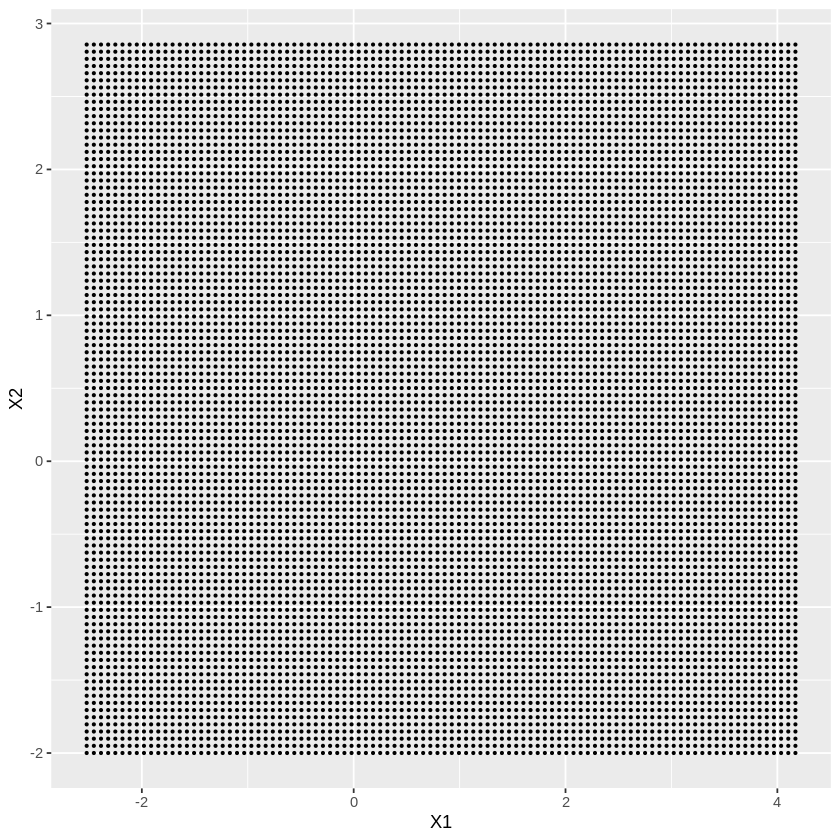

In [ ]:
quartz()
plot(g2)

Try different values of K

In [ ]:
install.packages("class")
require(class) #for functions require


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
knnplot <- function(train, test, k) {
  KNN <- knn(train[, c('X1','X2')],test,train$Y,k)
  test$predict <- KNN

  #change factor to numeric
  test$z <- c(0, 1)[sapply(test$predict , as.numeric)]

  title = paste ("k=", as.character(k),sep = "")
  g <- ggplot(data = test, aes(X1, X2)) + geom_point(aes(colour = predict), size = 0.5) + geom_contour(aes(z = z), colour = 'black', size = 0.1) + theme(legend.position = "none") + labs(title = title)

  #add the training points
  g <- g + geom_point(data =train, aes(X1,X2,colour = as.factor(Y),shape='x'))

  return(g)
}

Try diff values of k and save

In [ ]:
filer <- paste("k", c(1:10),".png",sep= "")
for (i in 1:10) {
  p <- knnplot(train, test, i)
  ggsave(filename= filer[i], plot =p,height =5,width =5)


}

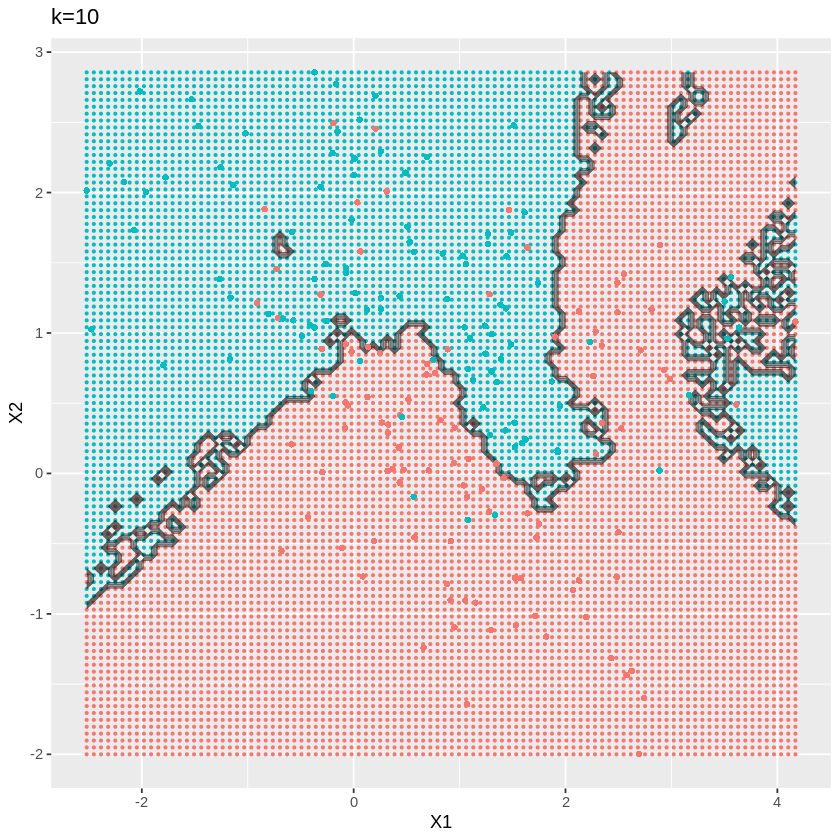

In [ ]:
p